In [1]:
import model_bert_fix
import data_bert
import config
import time
import tensorflow as tf
import numpy as np
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt

print("premodel")
model = model_bert_fix.Model(units_size = 450)
print("presampler")
training_sampler = model_bert_fix.TrainingSampler(embedded_vectors_folder = config.resources_path + "bert_embedded_vectors/bert_vectorized_L6_H128/",
                               contents_one_hot_file = config.resources_path + "one_hot_languages/contents_lang_train.npy",
                               topics_one_hot_file = config.resources_path + "one_hot_languages/topics_lang_train.npy", device = "cpu")
print("postsampler")
model.compile()
model.set_training_params(7500, 7500, training_sampler = training_sampler, training_max_size = 75000)

ctime = time.time()
checkpoint_file = config.training_models_path + "model_checkpoints/{epoch:07d}.ckpt"
logging_file = config.training_models_path + "model_checkpoints/logfile.csv"
callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_file, save_weights_only = True, verbose = 0, save_freq = 20)
csv_logger = tf.keras.callbacks.CSVLogger(logging_file, separator=',', append=False)

hist = model.fit(np.array([1, 2]), epochs = 100, callbacks=[callback, csv_logger], verbose = 2, steps_per_epoch = 1)
ctime = time.time() - ctime
print(ctime)

del model
del training_sampler

running_data = pd.DataFrame(hist.history)
display(Markdown("**Entropy metrics**"))
running_data[["entropy", "entropy_large_set","full_entropy"]].plot(figsize = (30, 30))

display(Markdown("**Training metrics**"))
running_data[["accuracy", "precision", "recall"]].plot(figsize = (30, 30))
plt.show()

display(Markdown("**Training full metrics**"))
running_data[[x for x in running_data.columns if x.startswith("full")]].plot(figsize = (30, 30))
plt.show()

display(Markdown("**Test metrics**"))
running_data[[x for x in running_data.columns if x.startswith("test")]].plot(figsize = (30, 30))
plt.show()

display(Markdown("**Training full metrics (no lang)**"))
running_data[[x for x in running_data.columns if x.startswith("no_lang_full")]].plot(figsize = (30, 30))
plt.show()

display(Markdown("**Test metrics (no lang)**"))
running_data[[x for x in running_data.columns if x.startswith("no_lang_test")]].plot(figsize = (30, 30))
plt.show()

premodel
presampler
postsampler
Epoch 1/100
1/1 - 10s - accuracy: 0.6607 - precision: 0.6345 - recall: 0.7584 - entropy: 0.6221 - full_accuracy: 0.5791 - full_precision: 6.3753e-05 - full_recall: 0.6667 - full_entropy: 0.6717 - test_precision: 2.6527e-05 - test_recall: 0.3333 - test_small_accuracy: 0.6266 - test_small_precision: 0.5987 - test_small_recall: 0.7682 - test_small_entropy: 0.6595 - no_lang_full_accuracy: 0.5477 - no_lang_full_precision: 5.9328e-05 - no_lang_full_recall: 0.6667 - no_lang_full_entropy: 0.6853 - no_lang_test_precision: 2.6857e-05 - no_lang_test_recall: 0.3333 - no_lang_test_small_accuracy: 0.6302 - no_lang_test_small_precision: 0.6017 - no_lang_test_small_recall: 0.7703 - no_lang_test_small_entropy: 0.6578 - entropy_large_set: 0.6221 - 10s/epoch - 10s/step
Epoch 2/100
1/1 - 10s - accuracy: 0.7452 - precision: 0.7163 - recall: 0.8120 - entropy: 0.5087 - full_accuracy: 0.6278 - full_precision: 5.4069e-05 - full_recall: 0.4286 - full_entropy: 0.6176 - test_precis

Epoch 12/100
1/1 - 10s - accuracy: 0.8821 - precision: 0.8439 - recall: 0.9377 - entropy: 0.2685 - full_accuracy: 0.7998 - full_precision: 2.6249e-04 - full_recall: 0.7833 - full_entropy: 0.3840 - test_precision: 1.6552e-04 - test_recall: 0.7115 - test_small_accuracy: 0.7419 - test_small_precision: 0.7453 - test_small_recall: 0.7351 - test_small_entropy: 0.5253 - no_lang_full_accuracy: 0.7491 - no_lang_full_precision: 2.0051e-04 - no_lang_full_recall: 0.7500 - no_lang_full_entropy: 0.4743 - no_lang_test_precision: 1.2458e-04 - no_lang_test_recall: 0.7115 - no_lang_test_small_accuracy: 0.7169 - no_lang_test_small_precision: 0.6971 - no_lang_test_small_recall: 0.7671 - no_lang_test_small_entropy: 0.5670 - entropy_large_set: 0.3628 - 10s/epoch - 10s/step
Epoch 13/100
1/1 - 10s - accuracy: 0.8882 - precision: 0.8588 - recall: 0.9292 - entropy: 0.2590 - full_accuracy: 0.8048 - full_precision: 2.8552e-04 - full_recall: 0.8060 - full_entropy: 0.3767 - test_precision: 1.8279e-04 - test_recall:

Epoch 23/100
1/1 - 10s - accuracy: 0.9096 - precision: 0.8734 - recall: 0.9582 - entropy: 0.2151 - full_accuracy: 0.8388 - full_precision: 3.0752e-04 - full_recall: 0.8416 - full_entropy: 0.3247 - test_precision: 2.6102e-04 - test_recall: 0.7154 - test_small_accuracy: 0.7656 - test_small_precision: 0.7892 - test_small_recall: 0.7247 - test_small_entropy: 0.5055 - no_lang_full_accuracy: 0.7909 - no_lang_full_precision: 2.3147e-04 - no_lang_full_recall: 0.8218 - no_lang_full_entropy: 0.4165 - no_lang_test_precision: 1.8535e-04 - no_lang_test_recall: 0.7398 - no_lang_test_small_accuracy: 0.7387 - no_lang_test_small_precision: 0.7287 - no_lang_test_small_recall: 0.7608 - no_lang_test_small_entropy: 0.5428 - entropy_large_set: 0.3001 - 10s/epoch - 10s/step
Epoch 24/100
1/1 - 10s - accuracy: 0.9131 - precision: 0.8831 - recall: 0.9523 - entropy: 0.2078 - full_accuracy: 0.8409 - full_precision: 3.1271e-04 - full_recall: 0.8476 - full_entropy: 0.3210 - test_precision: 2.6828e-04 - test_recall:

Epoch 34/100
1/1 - 10s - accuracy: 0.9285 - precision: 0.9016 - recall: 0.9620 - entropy: 0.1773 - full_accuracy: 0.8602 - full_precision: 3.5561e-04 - full_recall: 0.8690 - full_entropy: 0.2884 - test_precision: 3.2246e-04 - test_recall: 0.7113 - test_small_accuracy: 0.7735 - test_small_precision: 0.8113 - test_small_recall: 0.7128 - test_small_entropy: 0.5134 - no_lang_full_accuracy: 0.8154 - no_lang_full_precision: 2.6295e-04 - no_lang_full_recall: 0.8483 - no_lang_full_entropy: 0.3773 - no_lang_test_precision: 2.2390e-04 - no_lang_test_recall: 0.7526 - no_lang_test_small_accuracy: 0.7494 - no_lang_test_small_precision: 0.7477 - no_lang_test_small_recall: 0.7529 - no_lang_test_small_entropy: 0.5368 - entropy_large_set: 0.2652 - 10s/epoch - 10s/step
Epoch 35/100
1/1 - 10s - accuracy: 0.9279 - precision: 0.8966 - recall: 0.9673 - entropy: 0.1780 - full_accuracy: 0.8614 - full_precision: 3.6226e-04 - full_recall: 0.8733 - full_entropy: 0.2864 - test_precision: 3.2838e-04 - test_recall:

Epoch 45/100
1/1 - 10s - accuracy: 0.9365 - precision: 0.9070 - recall: 0.9728 - entropy: 0.1592 - full_accuracy: 0.8731 - full_precision: 4.4148e-04 - full_recall: 0.9082 - full_entropy: 0.2659 - test_precision: 3.7809e-04 - test_recall: 0.7191 - test_small_accuracy: 0.7773 - test_small_precision: 0.8248 - test_small_recall: 0.7041 - test_small_entropy: 0.5257 - no_lang_full_accuracy: 0.8313 - no_lang_full_precision: 3.2507e-04 - no_lang_full_recall: 0.8889 - no_lang_full_entropy: 0.3514 - no_lang_test_precision: 2.5709e-04 - no_lang_test_recall: 0.7640 - no_lang_test_small_accuracy: 0.7559 - no_lang_test_small_precision: 0.7607 - no_lang_test_small_recall: 0.7468 - no_lang_test_small_entropy: 0.5363 - entropy_large_set: 0.2414 - 10s/epoch - 10s/step
Epoch 46/100
1/1 - 10s - accuracy: 0.9341 - precision: 0.9017 - recall: 0.9745 - entropy: 0.1637 - full_accuracy: 0.8738 - full_precision: 4.4132e-04 - full_recall: 0.9095 - full_entropy: 0.2647 - test_precision: 3.8267e-04 - test_recall:

Epoch 56/100
1/1 - 10s - accuracy: 0.9432 - precision: 0.9146 - recall: 0.9777 - entropy: 0.1445 - full_accuracy: 0.8824 - full_precision: 4.8058e-04 - full_recall: 0.9255 - full_entropy: 0.2490 - test_precision: 4.0123e-04 - test_recall: 0.7061 - test_small_accuracy: 0.7791 - test_small_precision: 0.8347 - test_small_recall: 0.6960 - test_small_entropy: 0.5400 - no_lang_full_accuracy: 0.8424 - no_lang_full_precision: 3.4965e-04 - no_lang_full_recall: 0.9020 - no_lang_full_entropy: 0.3320 - no_lang_test_precision: 2.6982e-04 - no_lang_test_recall: 0.7515 - no_lang_test_small_accuracy: 0.7602 - no_lang_test_small_precision: 0.7712 - no_lang_test_small_recall: 0.7399 - no_lang_test_small_entropy: 0.5401 - entropy_large_set: 0.2235 - 10s/epoch - 10s/step
Epoch 57/100
1/1 - 10s - accuracy: 0.9442 - precision: 0.9154 - recall: 0.9789 - entropy: 0.1415 - full_accuracy: 0.8831 - full_precision: 4.8501e-04 - full_recall: 0.9269 - full_entropy: 0.2478 - test_precision: 4.0043e-04 - test_recall:

Epoch 67/100
1/1 - 10s - accuracy: 0.9440 - precision: 0.9098 - recall: 0.9856 - entropy: 0.1405 - full_accuracy: 0.8903 - full_precision: 5.0891e-04 - full_recall: 0.9362 - full_entropy: 0.2346 - test_precision: 4.1985e-04 - test_recall: 0.6985 - test_small_accuracy: 0.7799 - test_small_precision: 0.8424 - test_small_recall: 0.6886 - test_small_entropy: 0.5541 - no_lang_full_accuracy: 0.8522 - no_lang_full_precision: 3.6966e-04 - no_lang_full_recall: 0.9161 - no_lang_full_entropy: 0.3146 - no_lang_test_precision: 2.7821e-04 - no_lang_test_recall: 0.7397 - no_lang_test_small_accuracy: 0.7630 - no_lang_test_small_precision: 0.7798 - no_lang_test_small_recall: 0.7330 - no_lang_test_small_entropy: 0.5458 - entropy_large_set: 0.2092 - 10s/epoch - 10s/step
Epoch 68/100
1/1 - 10s - accuracy: 0.9513 - precision: 0.9278 - recall: 0.9787 - entropy: 0.1286 - full_accuracy: 0.8910 - full_precision: 5.1557e-04 - full_recall: 0.9375 - full_entropy: 0.2332 - test_precision: 4.1925e-04 - test_recall:

Epoch 78/100
1/1 - 10s - accuracy: 0.9531 - precision: 0.9254 - recall: 0.9855 - entropy: 0.1239 - full_accuracy: 0.8958 - full_precision: 5.5453e-04 - full_recall: 0.9465 - full_entropy: 0.2247 - test_precision: 4.3295e-04 - test_recall: 0.6874 - test_small_accuracy: 0.7812 - test_small_precision: 0.8483 - test_small_recall: 0.6850 - test_small_entropy: 0.5633 - no_lang_full_accuracy: 0.8588 - no_lang_full_precision: 4.0179e-04 - no_lang_full_recall: 0.9296 - no_lang_full_entropy: 0.3031 - no_lang_test_precision: 2.8807e-04 - no_lang_test_recall: 0.7339 - no_lang_test_small_accuracy: 0.7656 - no_lang_test_small_precision: 0.7866 - no_lang_test_small_recall: 0.7290 - no_lang_test_small_entropy: 0.5505 - entropy_large_set: 0.1979 - 10s/epoch - 10s/step
Epoch 79/100
1/1 - 10s - accuracy: 0.9577 - precision: 0.9370 - recall: 0.9814 - entropy: 0.1163 - full_accuracy: 0.8965 - full_precision: 5.5087e-04 - full_recall: 0.9465 - full_entropy: 0.2234 - test_precision: 4.3528e-04 - test_recall:

Epoch 89/100
1/1 - 10s - accuracy: 0.9557 - precision: 0.9280 - recall: 0.9880 - entropy: 0.1158 - full_accuracy: 0.9010 - full_precision: 6.0703e-04 - full_recall: 0.9545 - full_entropy: 0.2150 - test_precision: 4.6015e-04 - test_recall: 0.6917 - test_small_accuracy: 0.7818 - test_small_precision: 0.8531 - test_small_recall: 0.6809 - test_small_entropy: 0.5742 - no_lang_full_accuracy: 0.8651 - no_lang_full_precision: 4.3572e-04 - no_lang_full_recall: 0.9330 - no_lang_full_entropy: 0.2913 - no_lang_test_precision: 3.0024e-04 - no_lang_test_recall: 0.7264 - no_lang_test_small_accuracy: 0.7673 - no_lang_test_small_precision: 0.7926 - no_lang_test_small_recall: 0.7241 - no_lang_test_small_entropy: 0.5574 - entropy_large_set: 0.1881 - 10s/epoch - 10s/step
Epoch 90/100
1/1 - 10s - accuracy: 0.9550 - precision: 0.9268 - recall: 0.9881 - entropy: 0.1182 - full_accuracy: 0.9013 - full_precision: 6.1016e-04 - full_recall: 0.9551 - full_entropy: 0.2143 - test_precision: 4.6294e-04 - test_recall:

Epoch 100/100
1/1 - 10s - accuracy: 0.9565 - precision: 0.9267 - recall: 0.9916 - entropy: 0.1129 - full_accuracy: 0.9050 - full_precision: 6.3219e-04 - full_recall: 0.9512 - full_entropy: 0.2075 - test_precision: 4.6673e-04 - test_recall: 0.6840 - test_small_accuracy: 0.7826 - test_small_precision: 0.8571 - test_small_recall: 0.6782 - test_small_entropy: 0.5833 - no_lang_full_accuracy: 0.8701 - no_lang_full_precision: 4.5229e-04 - no_lang_full_recall: 0.9299 - no_lang_full_entropy: 0.2821 - no_lang_test_precision: 3.0441e-04 - no_lang_test_recall: 0.7188 - no_lang_test_small_accuracy: 0.7687 - no_lang_test_small_precision: 0.7975 - no_lang_test_small_recall: 0.7204 - no_lang_test_small_entropy: 0.5636 - entropy_large_set: 0.1801 - 10s/epoch - 10s/step
967.0166757106781


NameError: name 'pd' is not defined

**Entropy metrics**

**Training metrics**

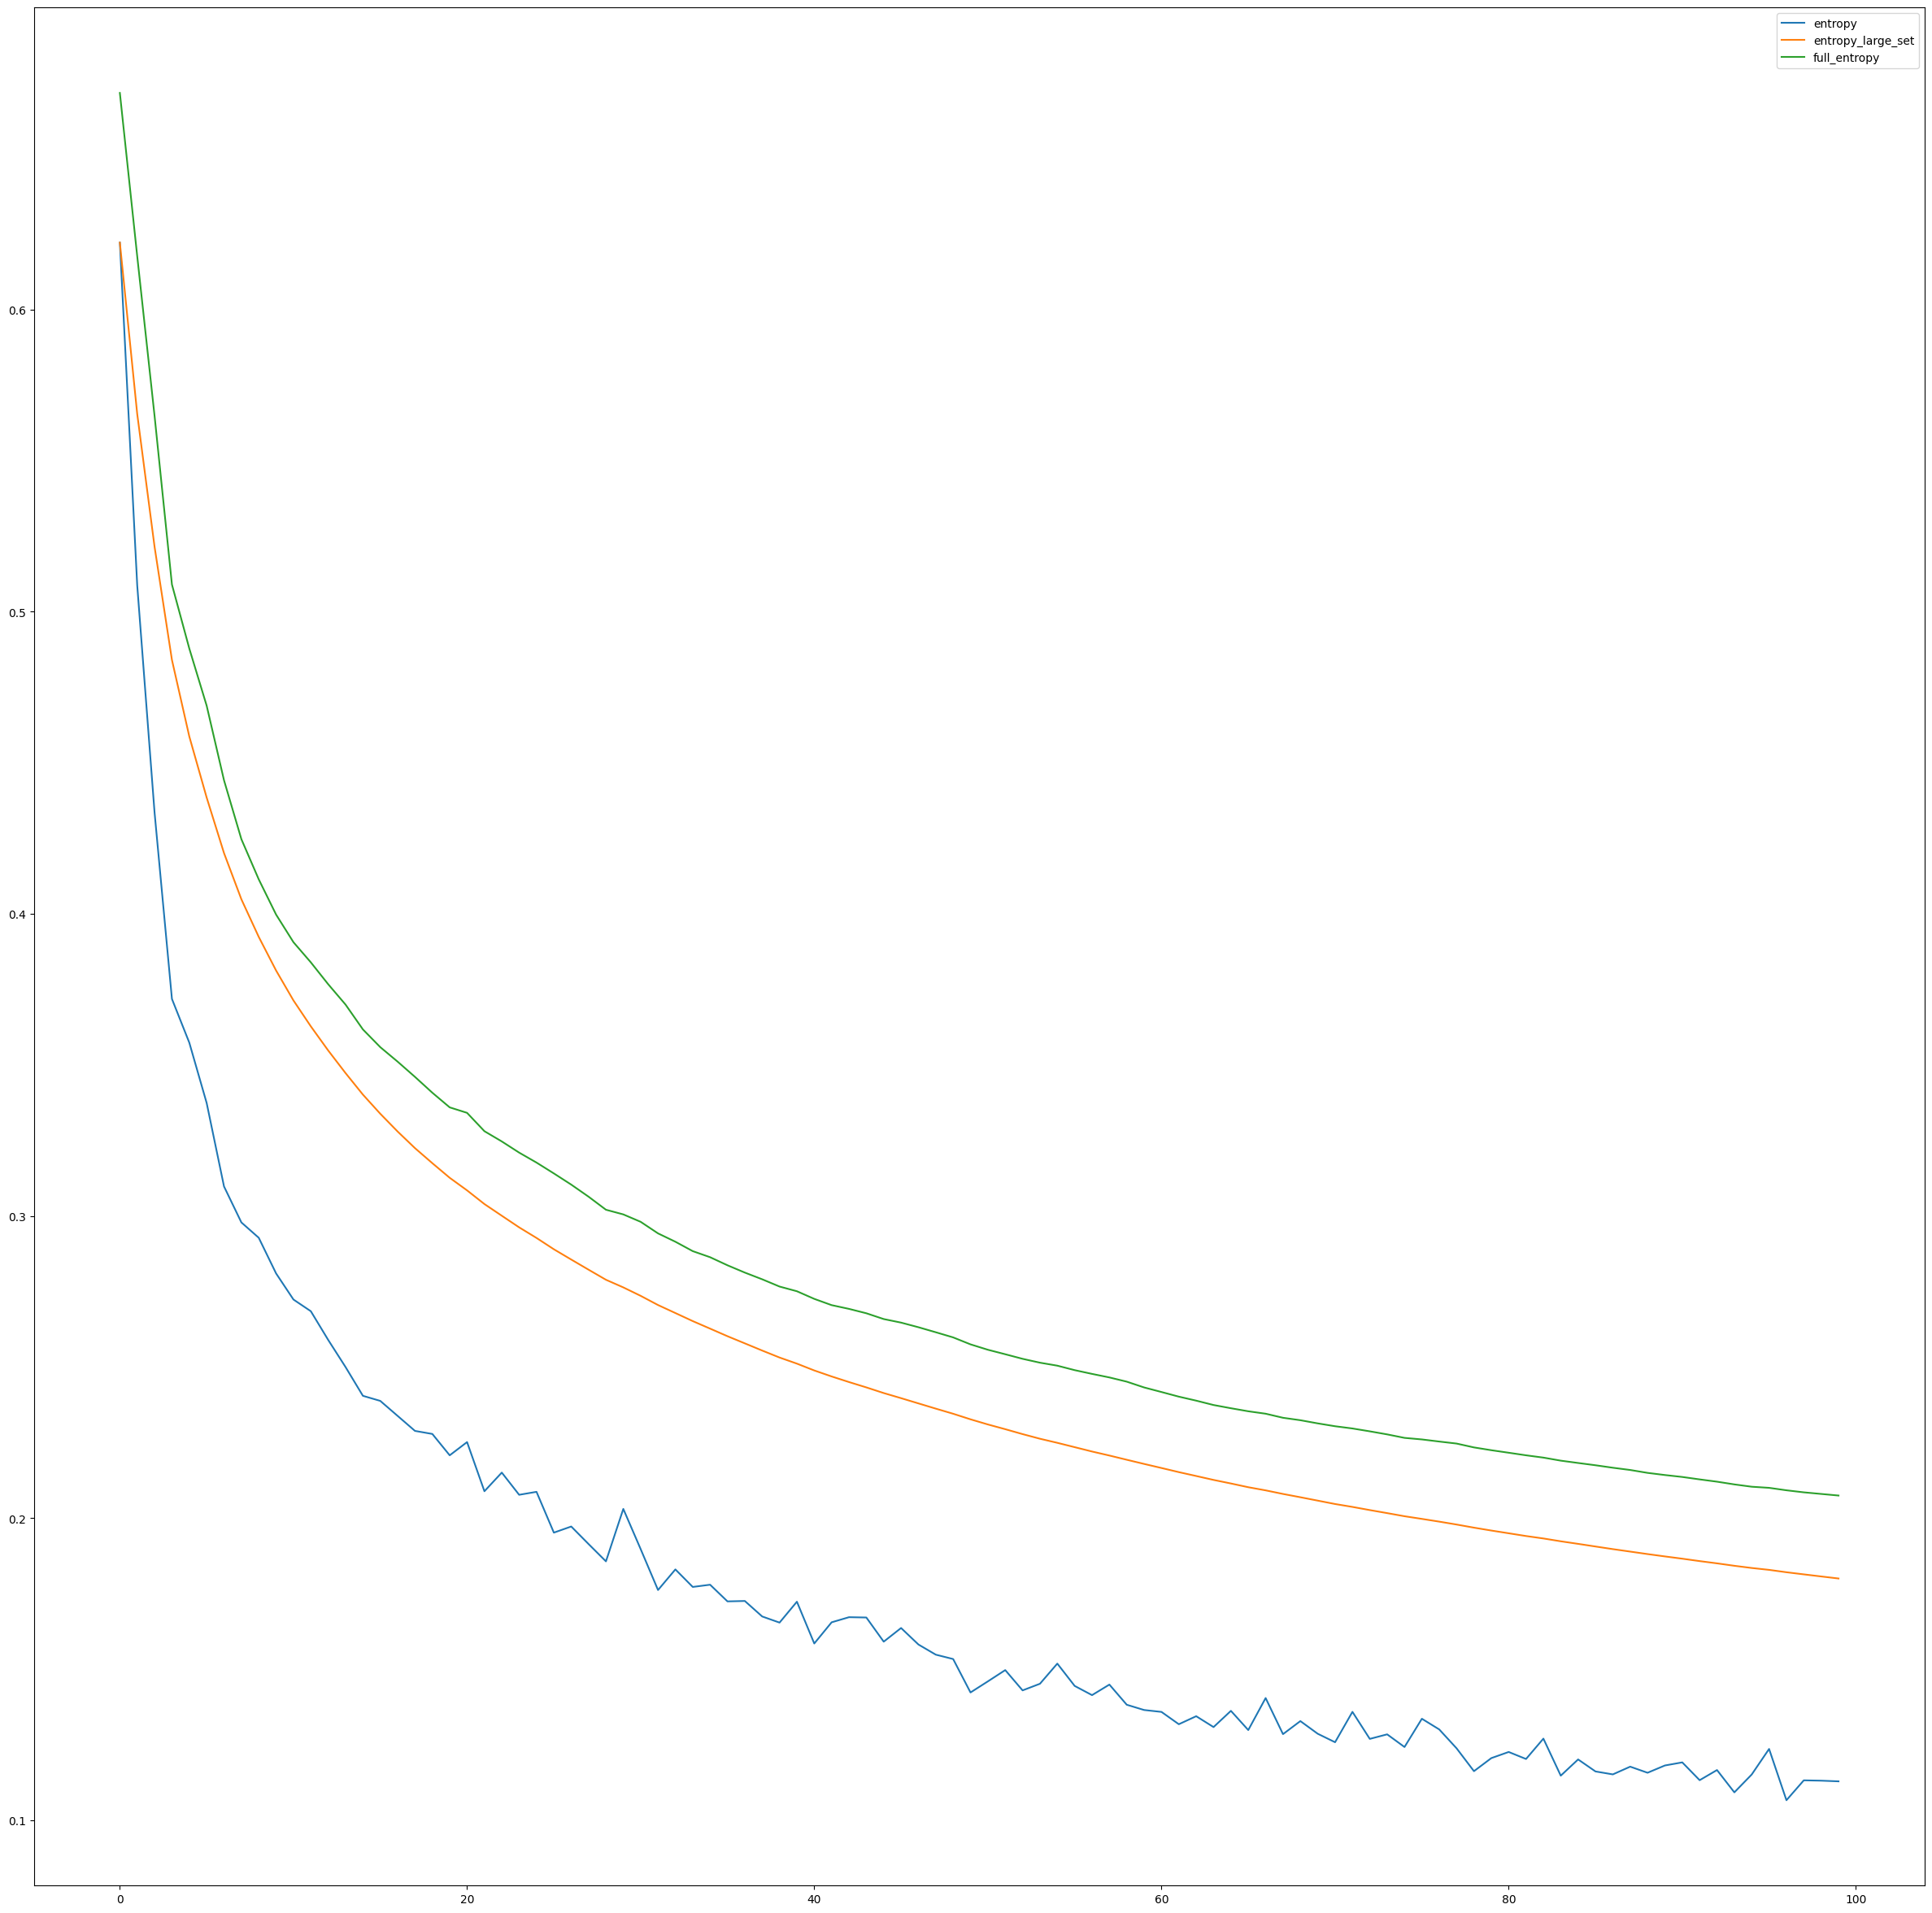

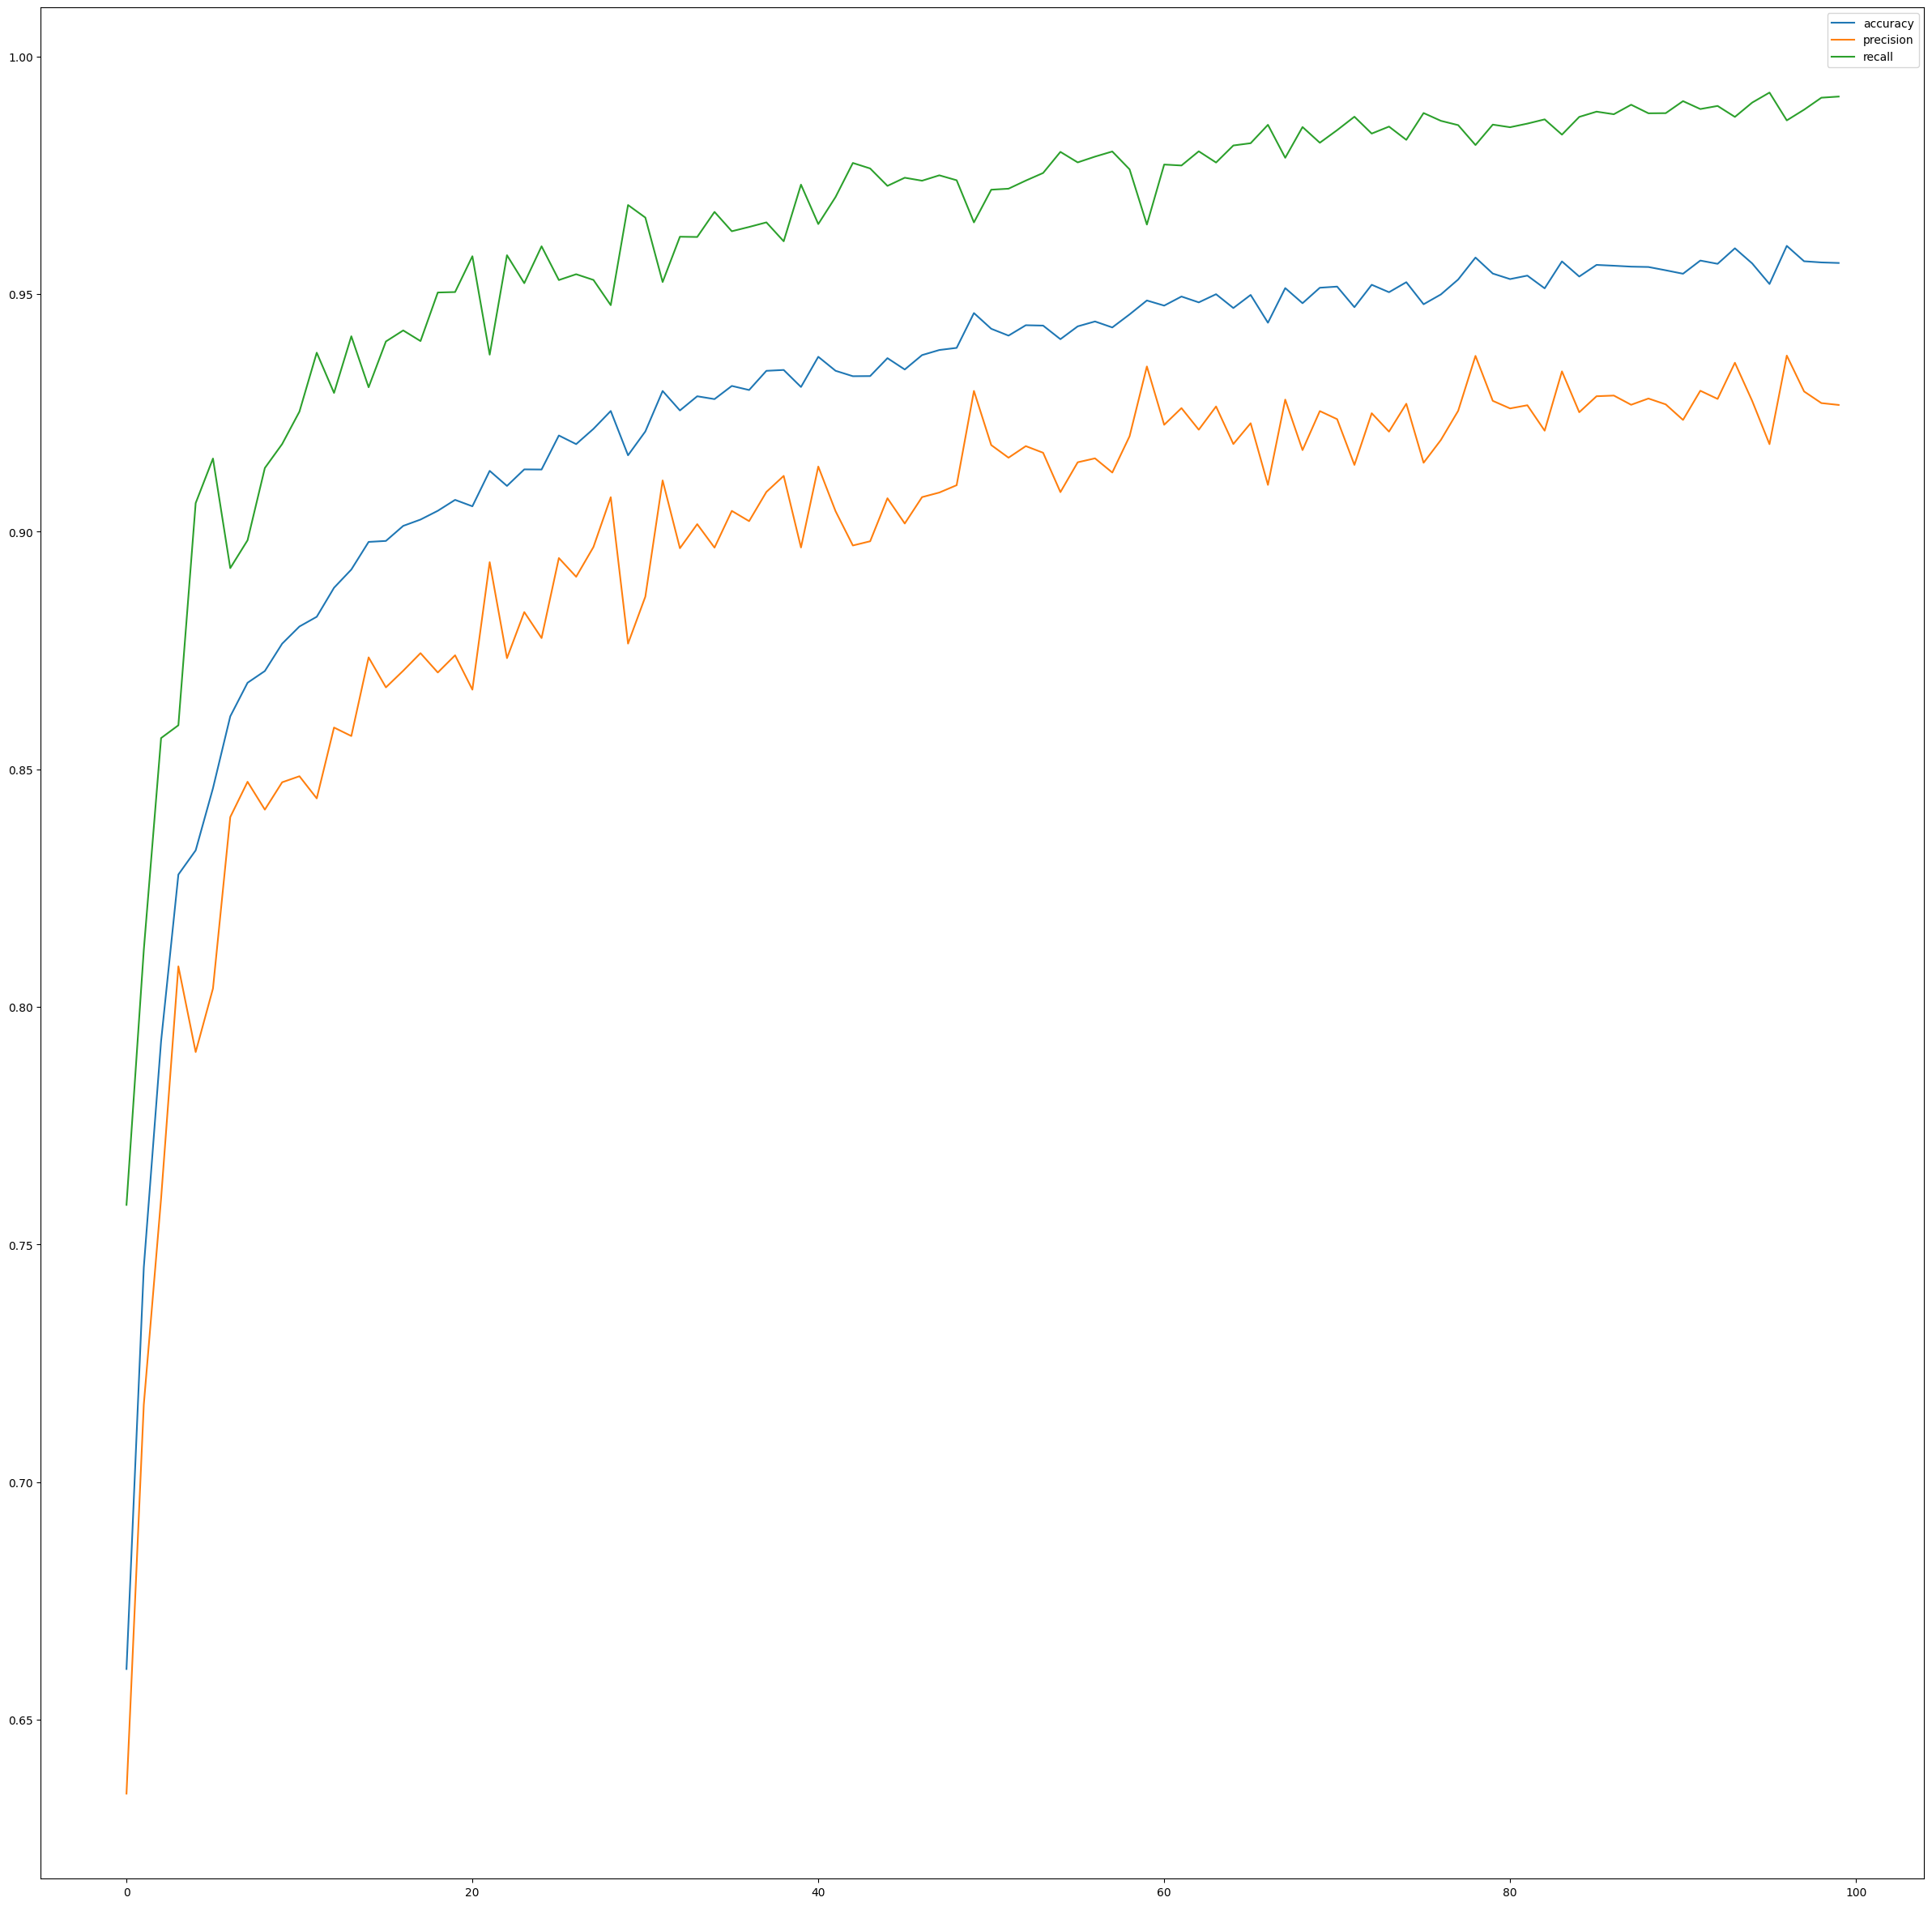

**Training full metrics**

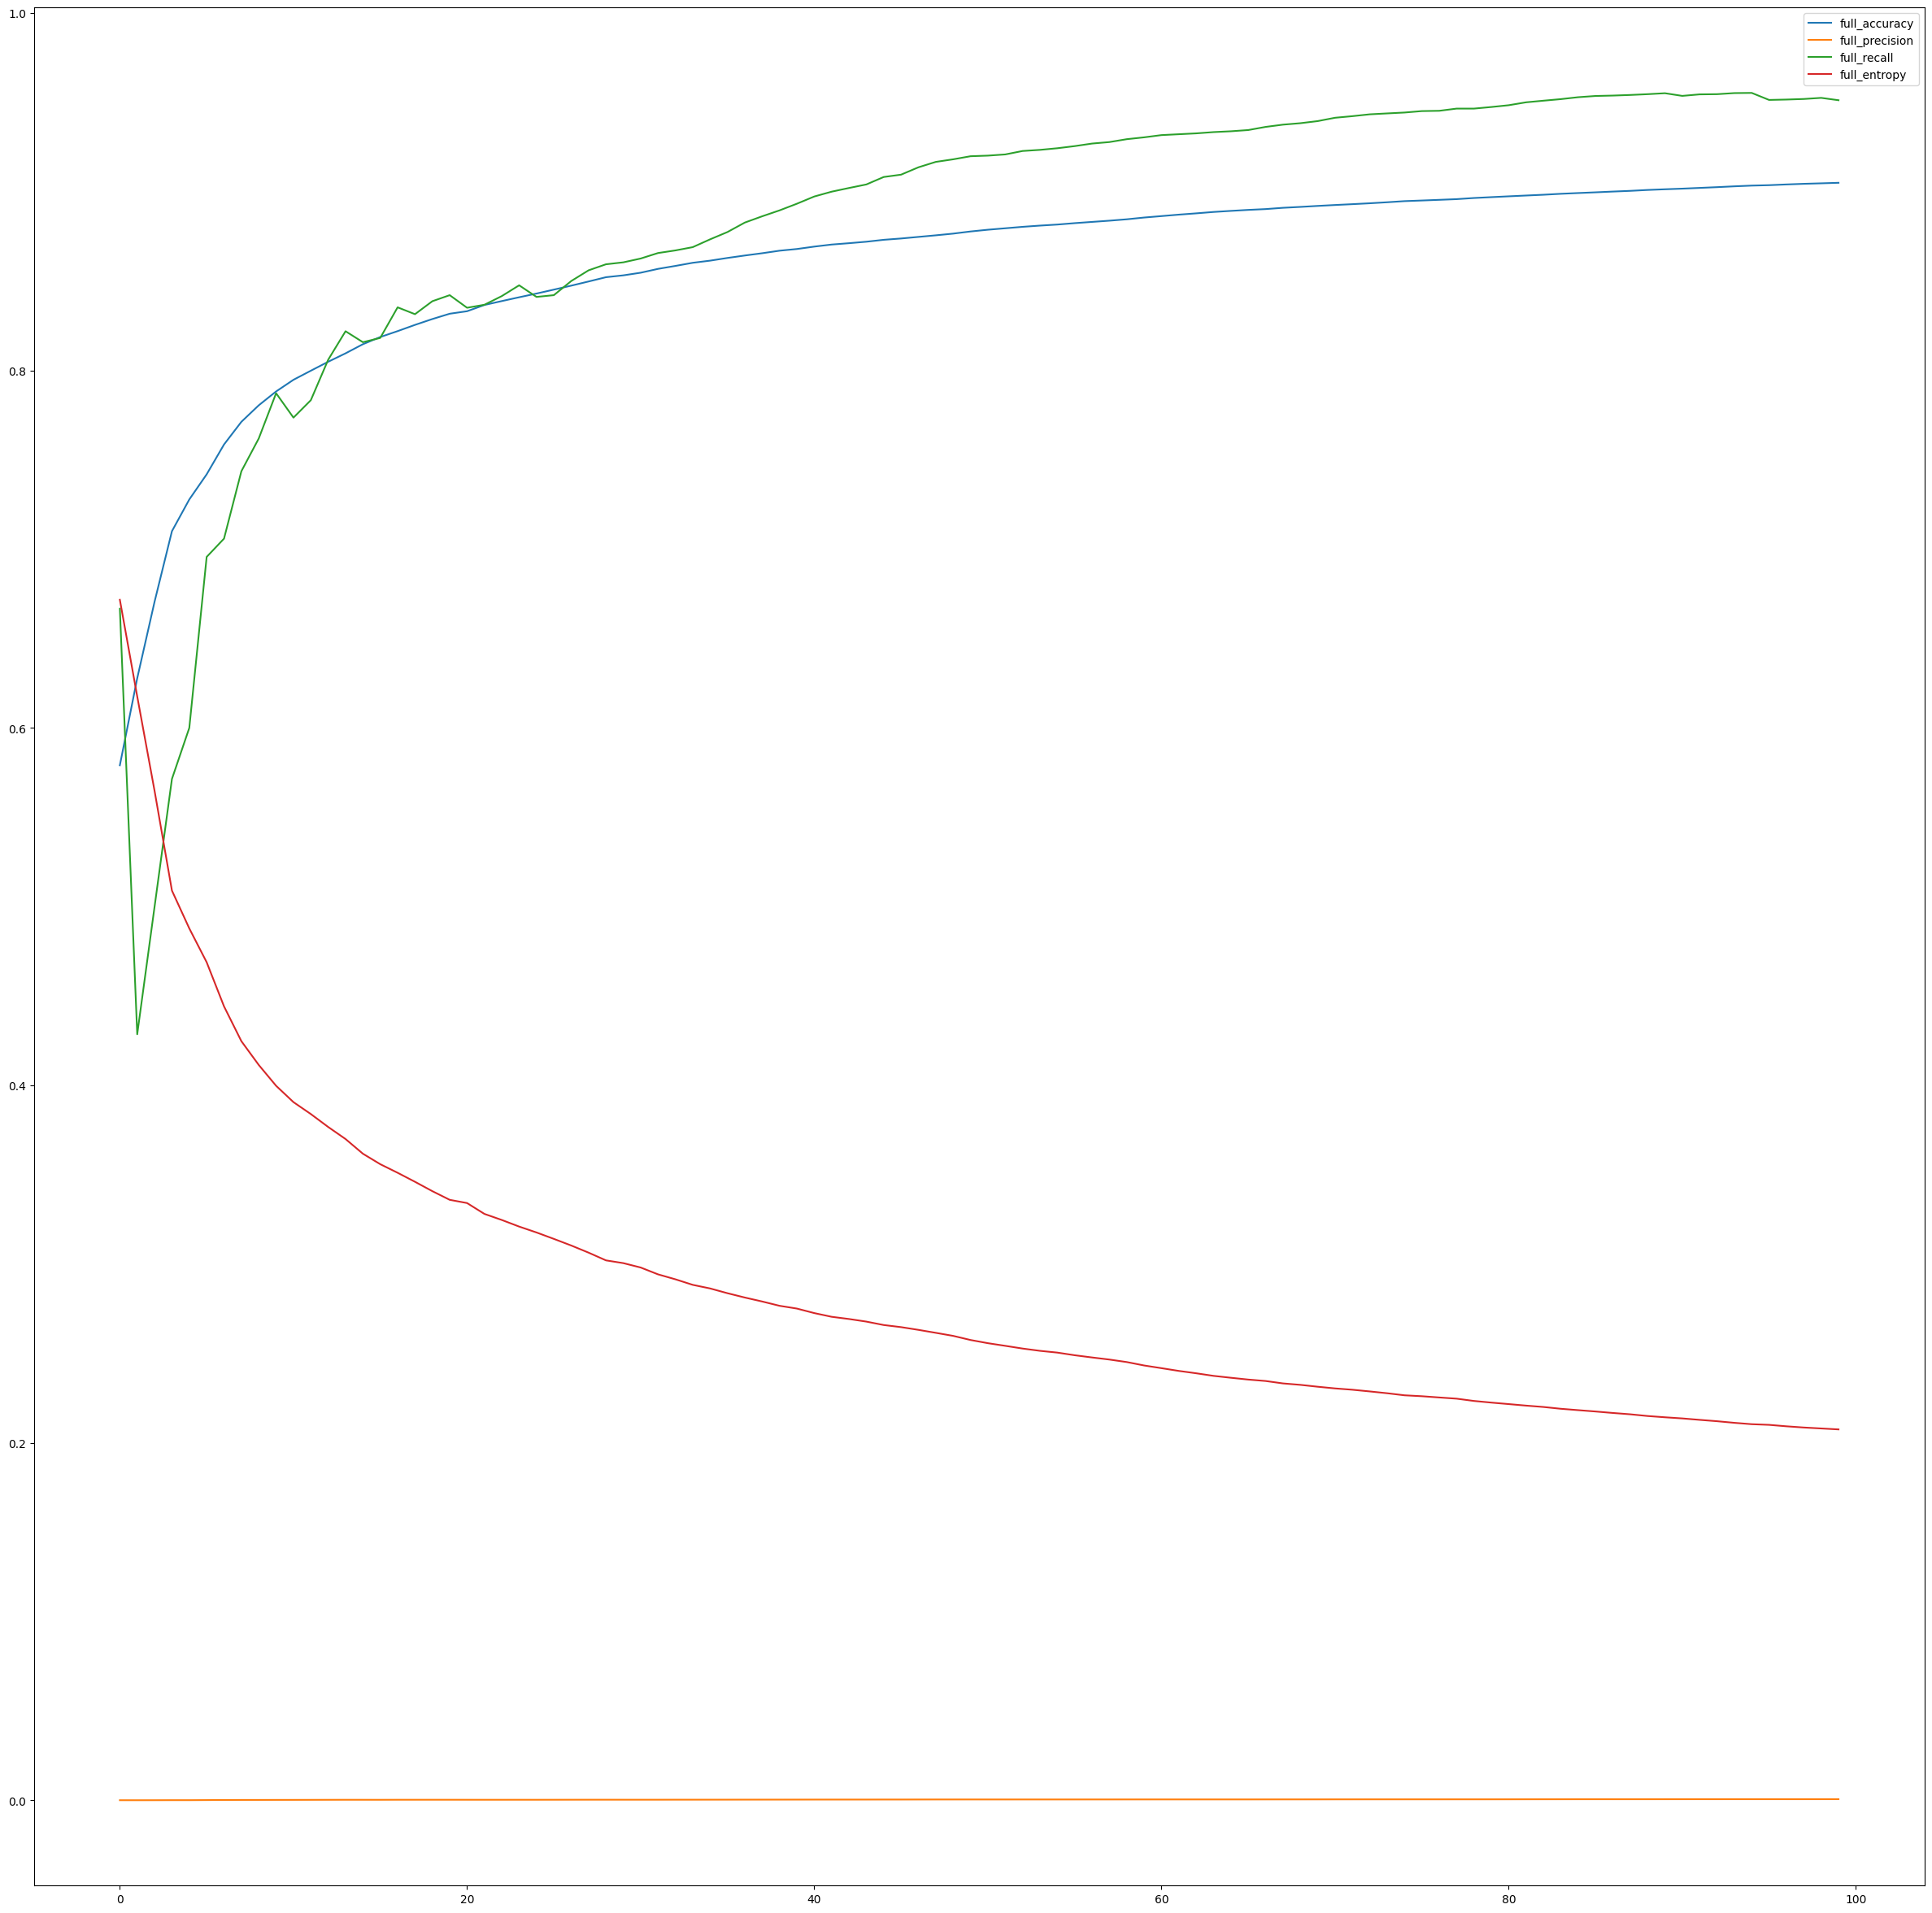

**Test metrics**

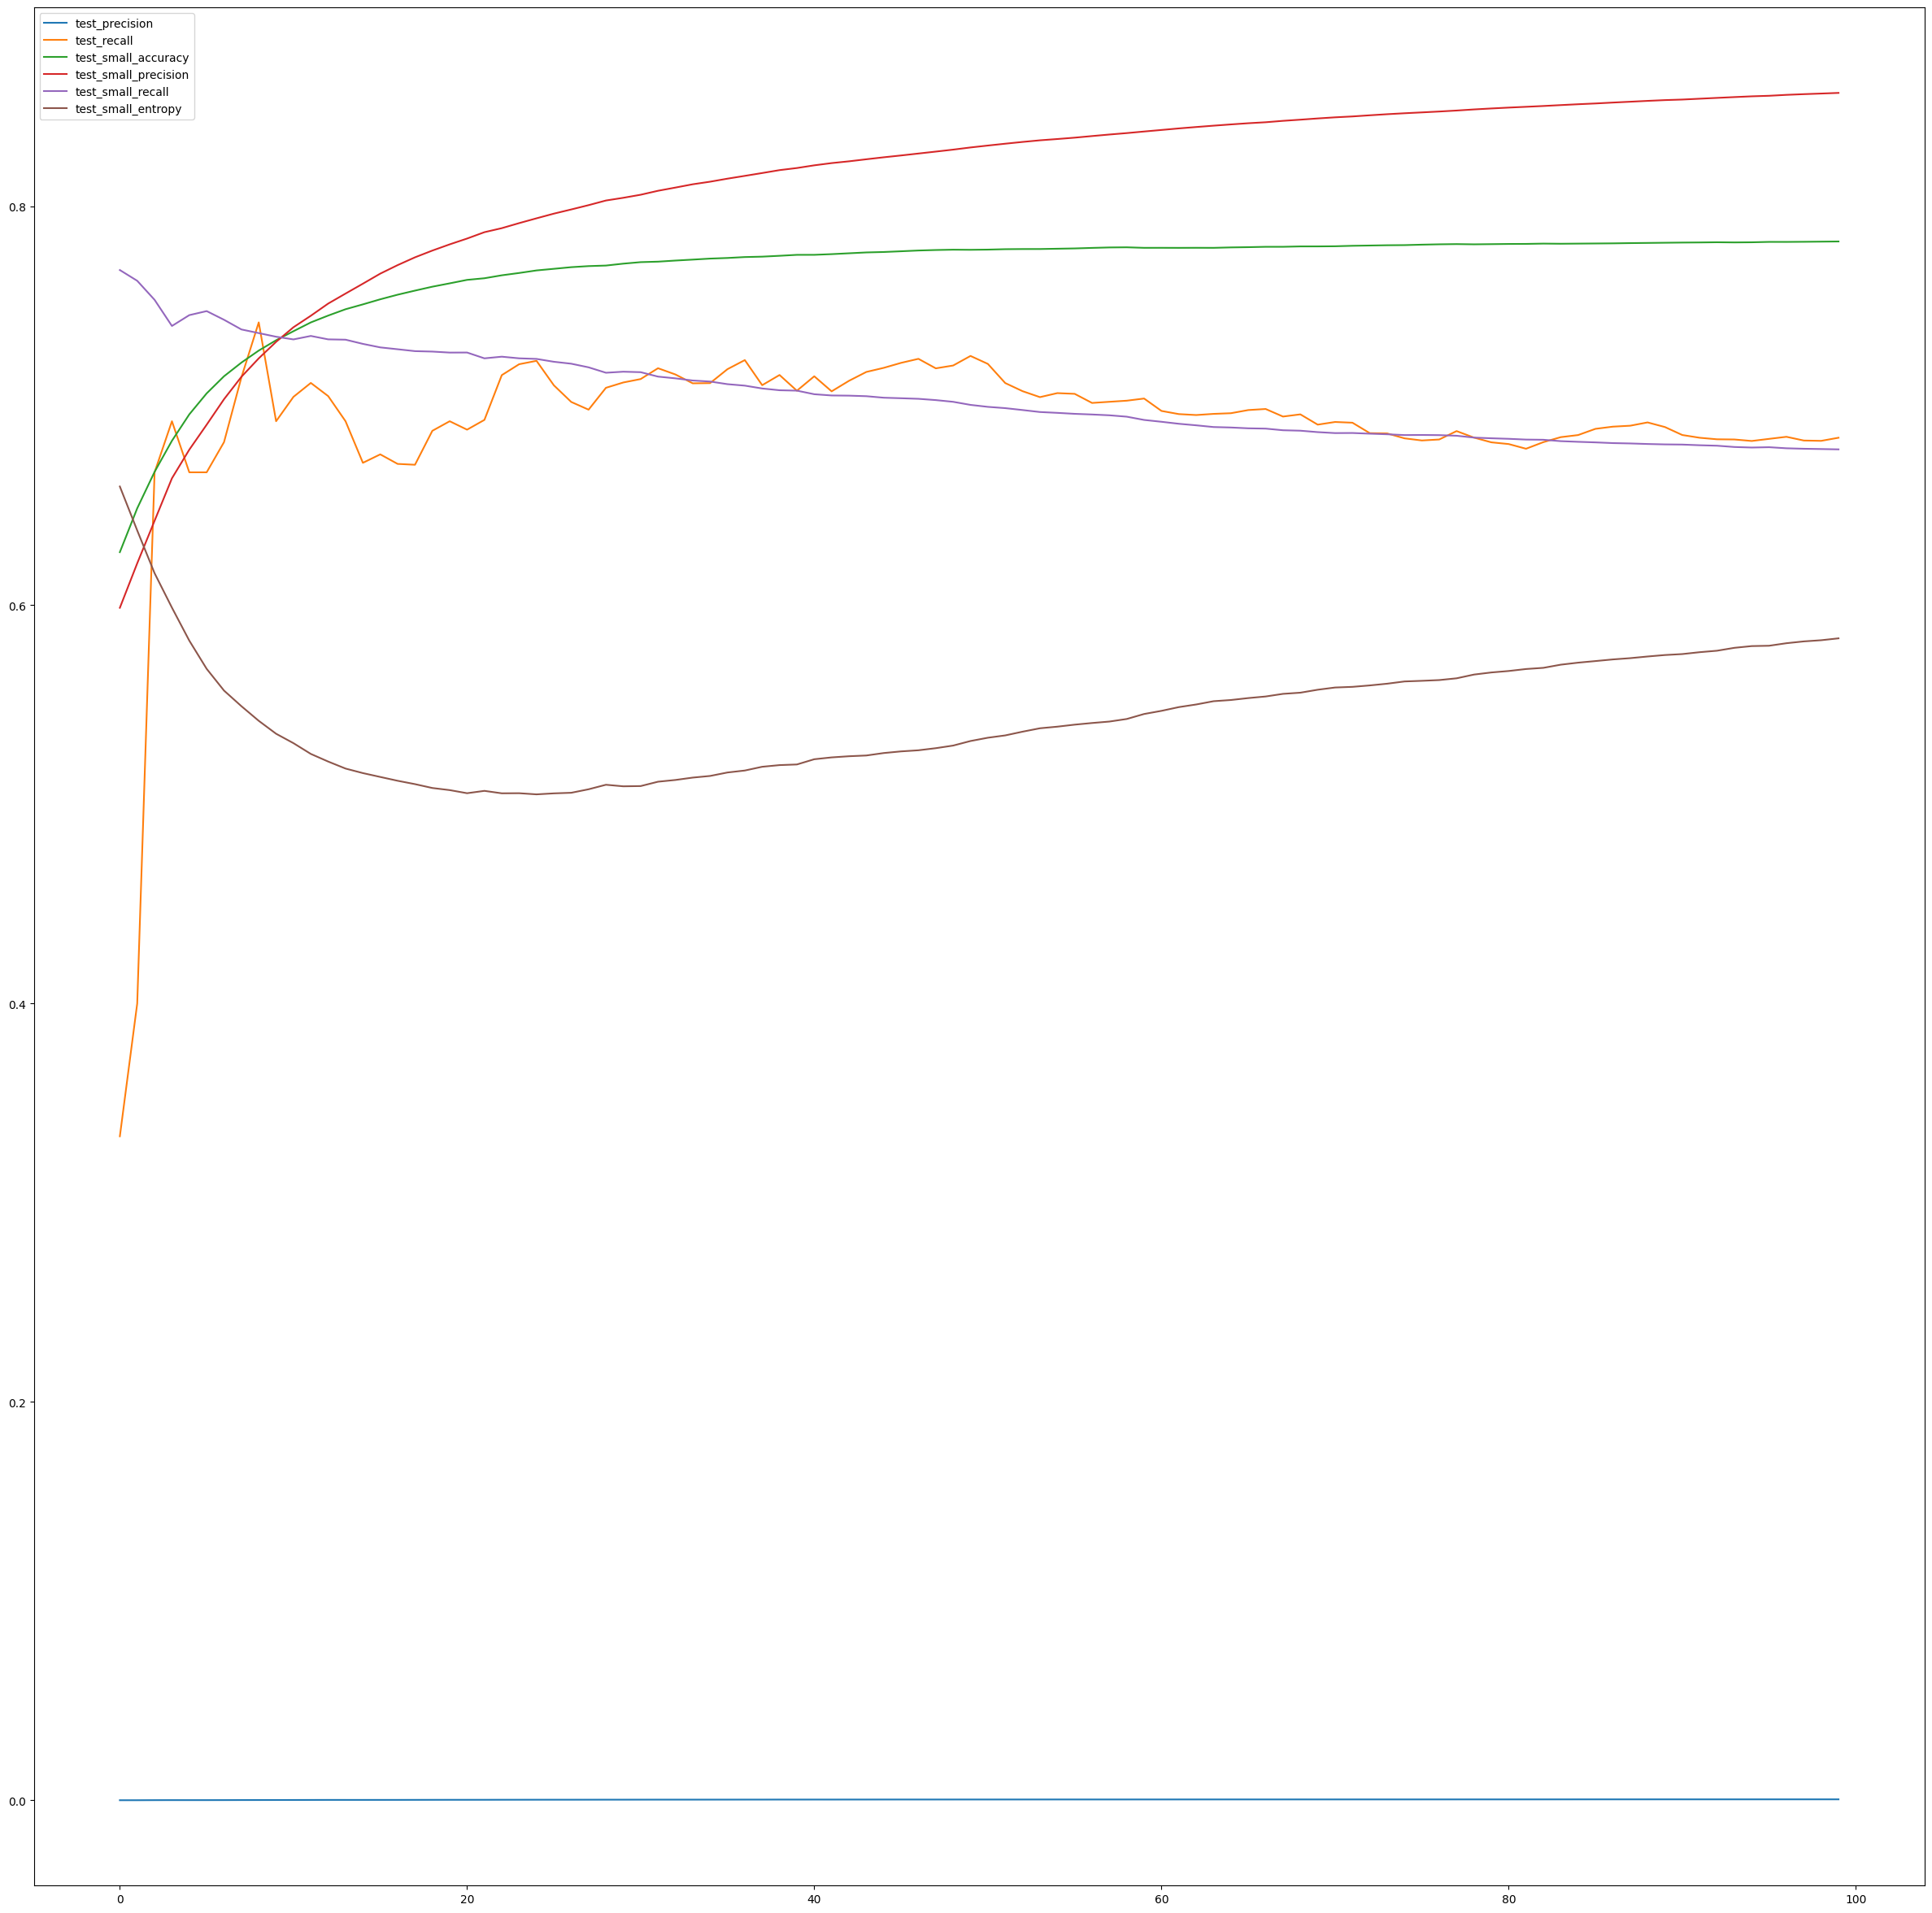

**Training full metrics (no lang)**

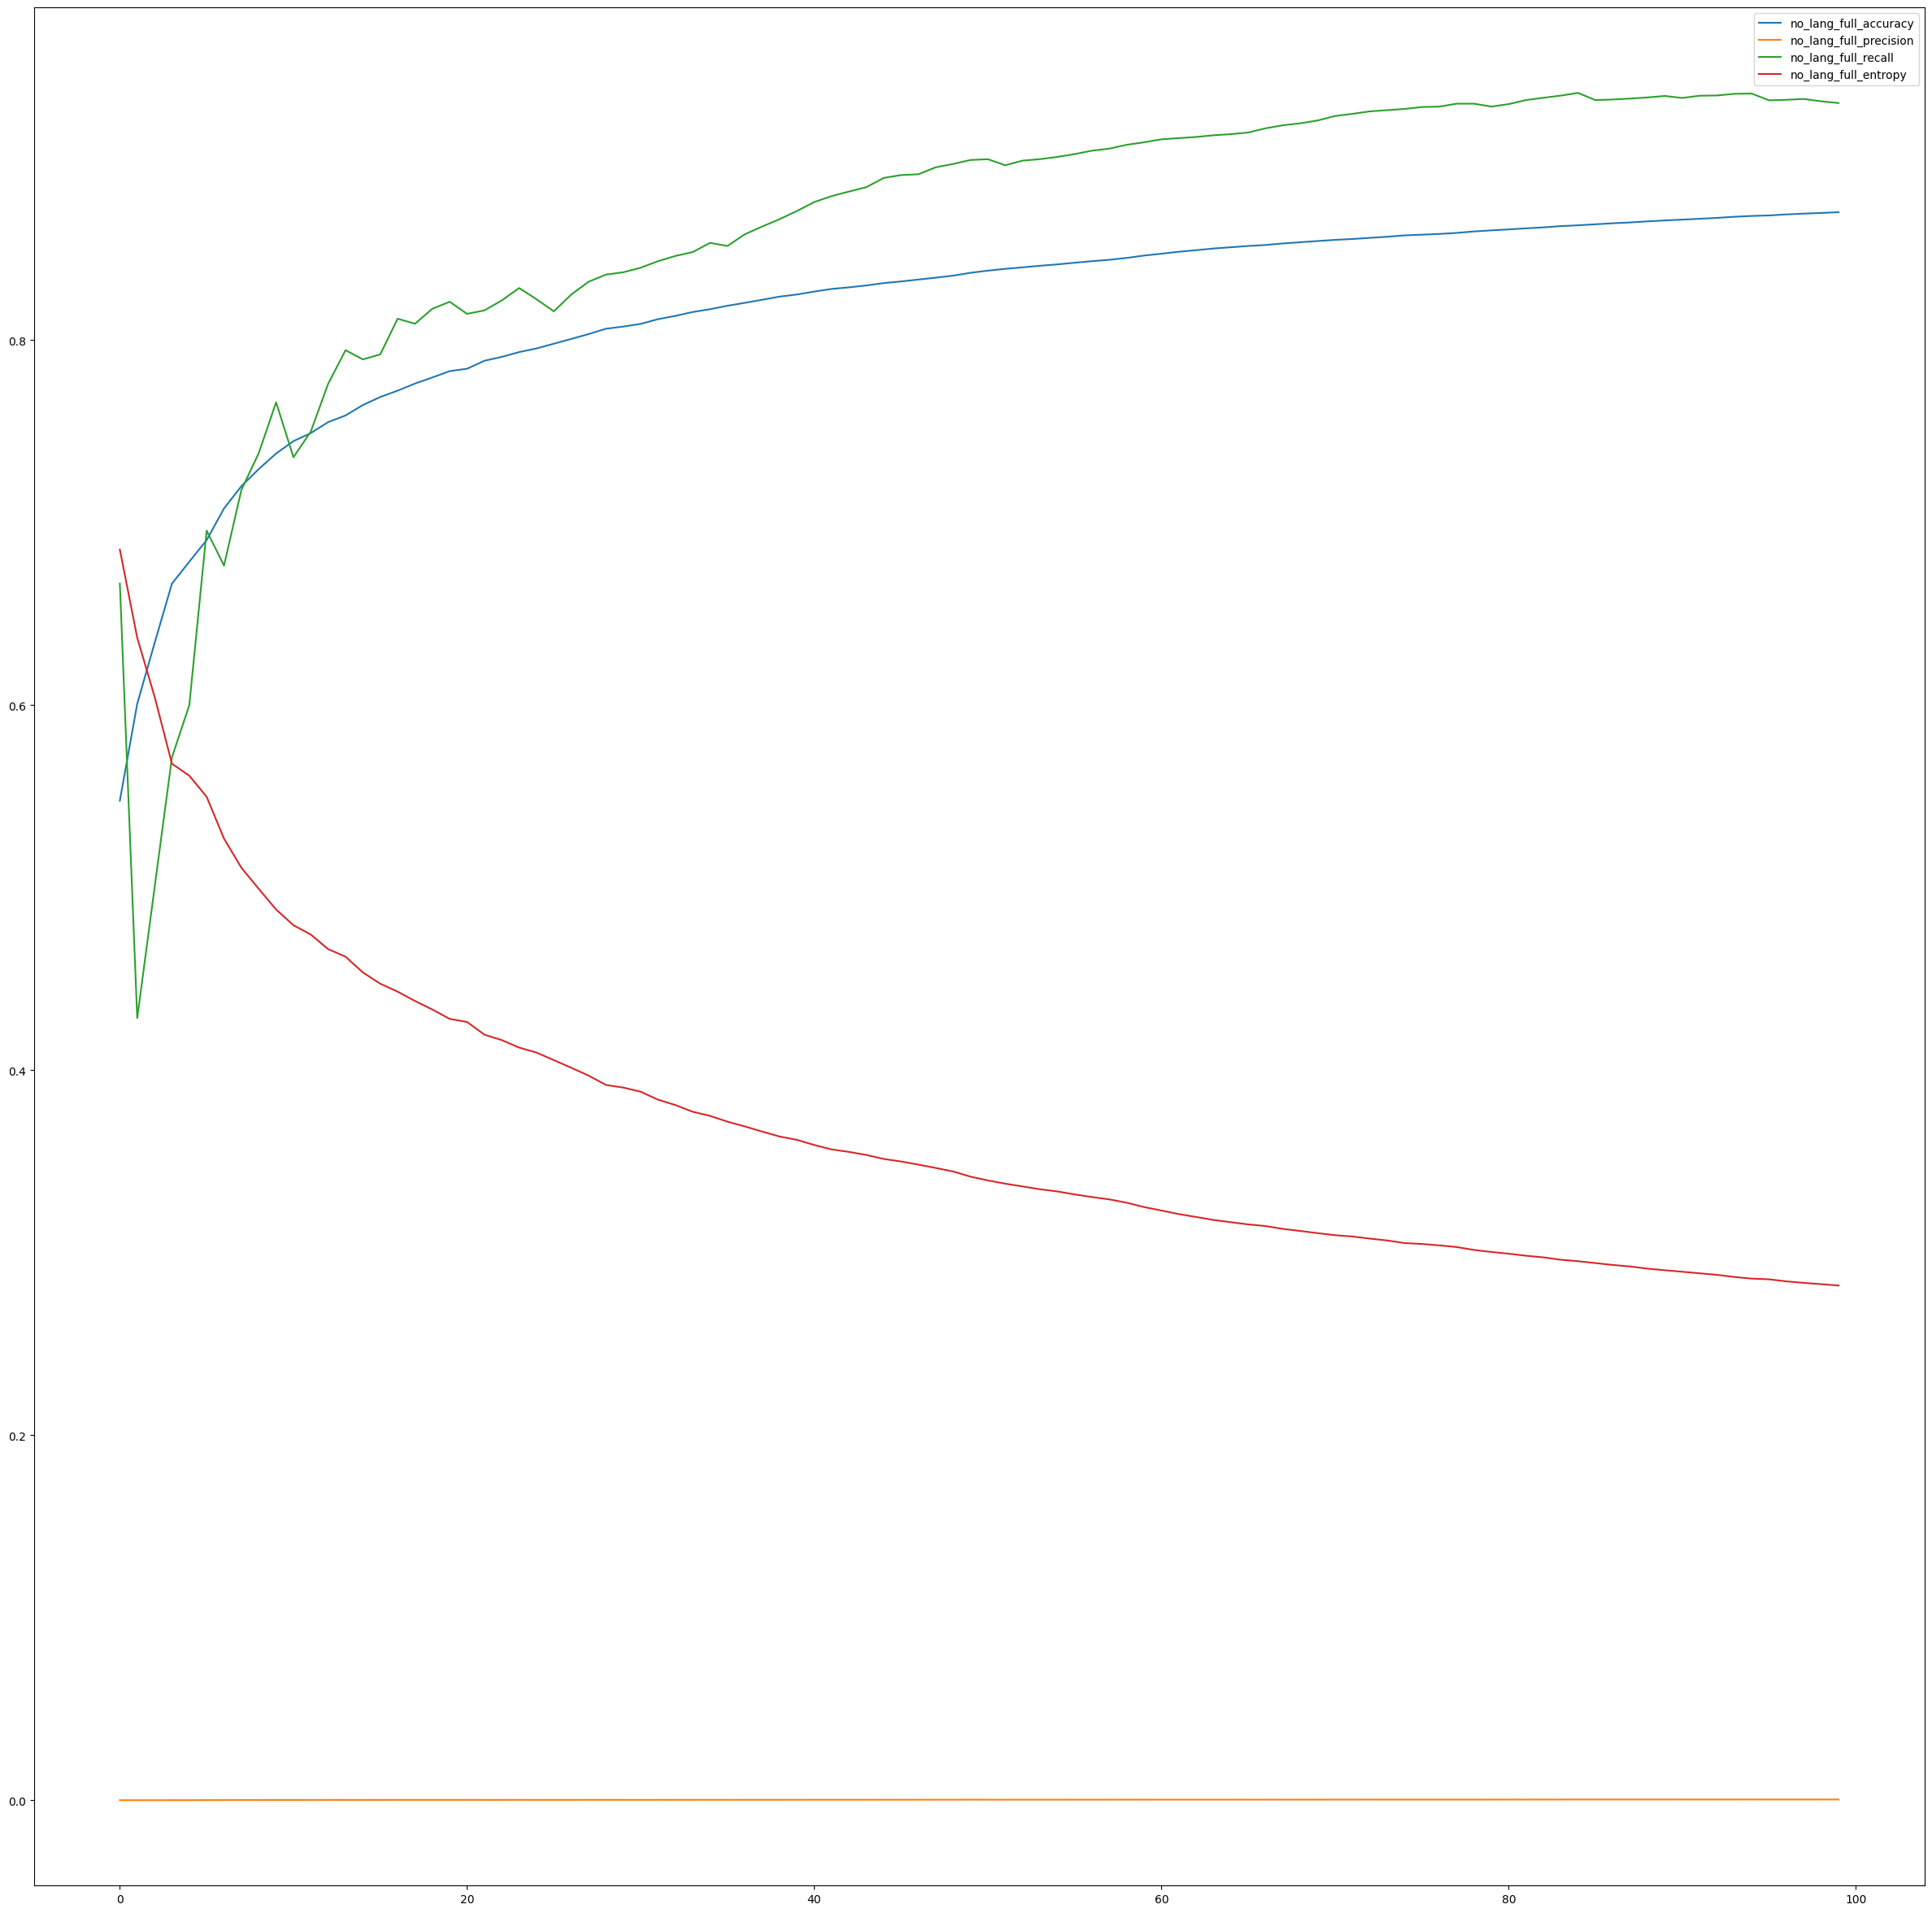

**Test metrics (no lang)**

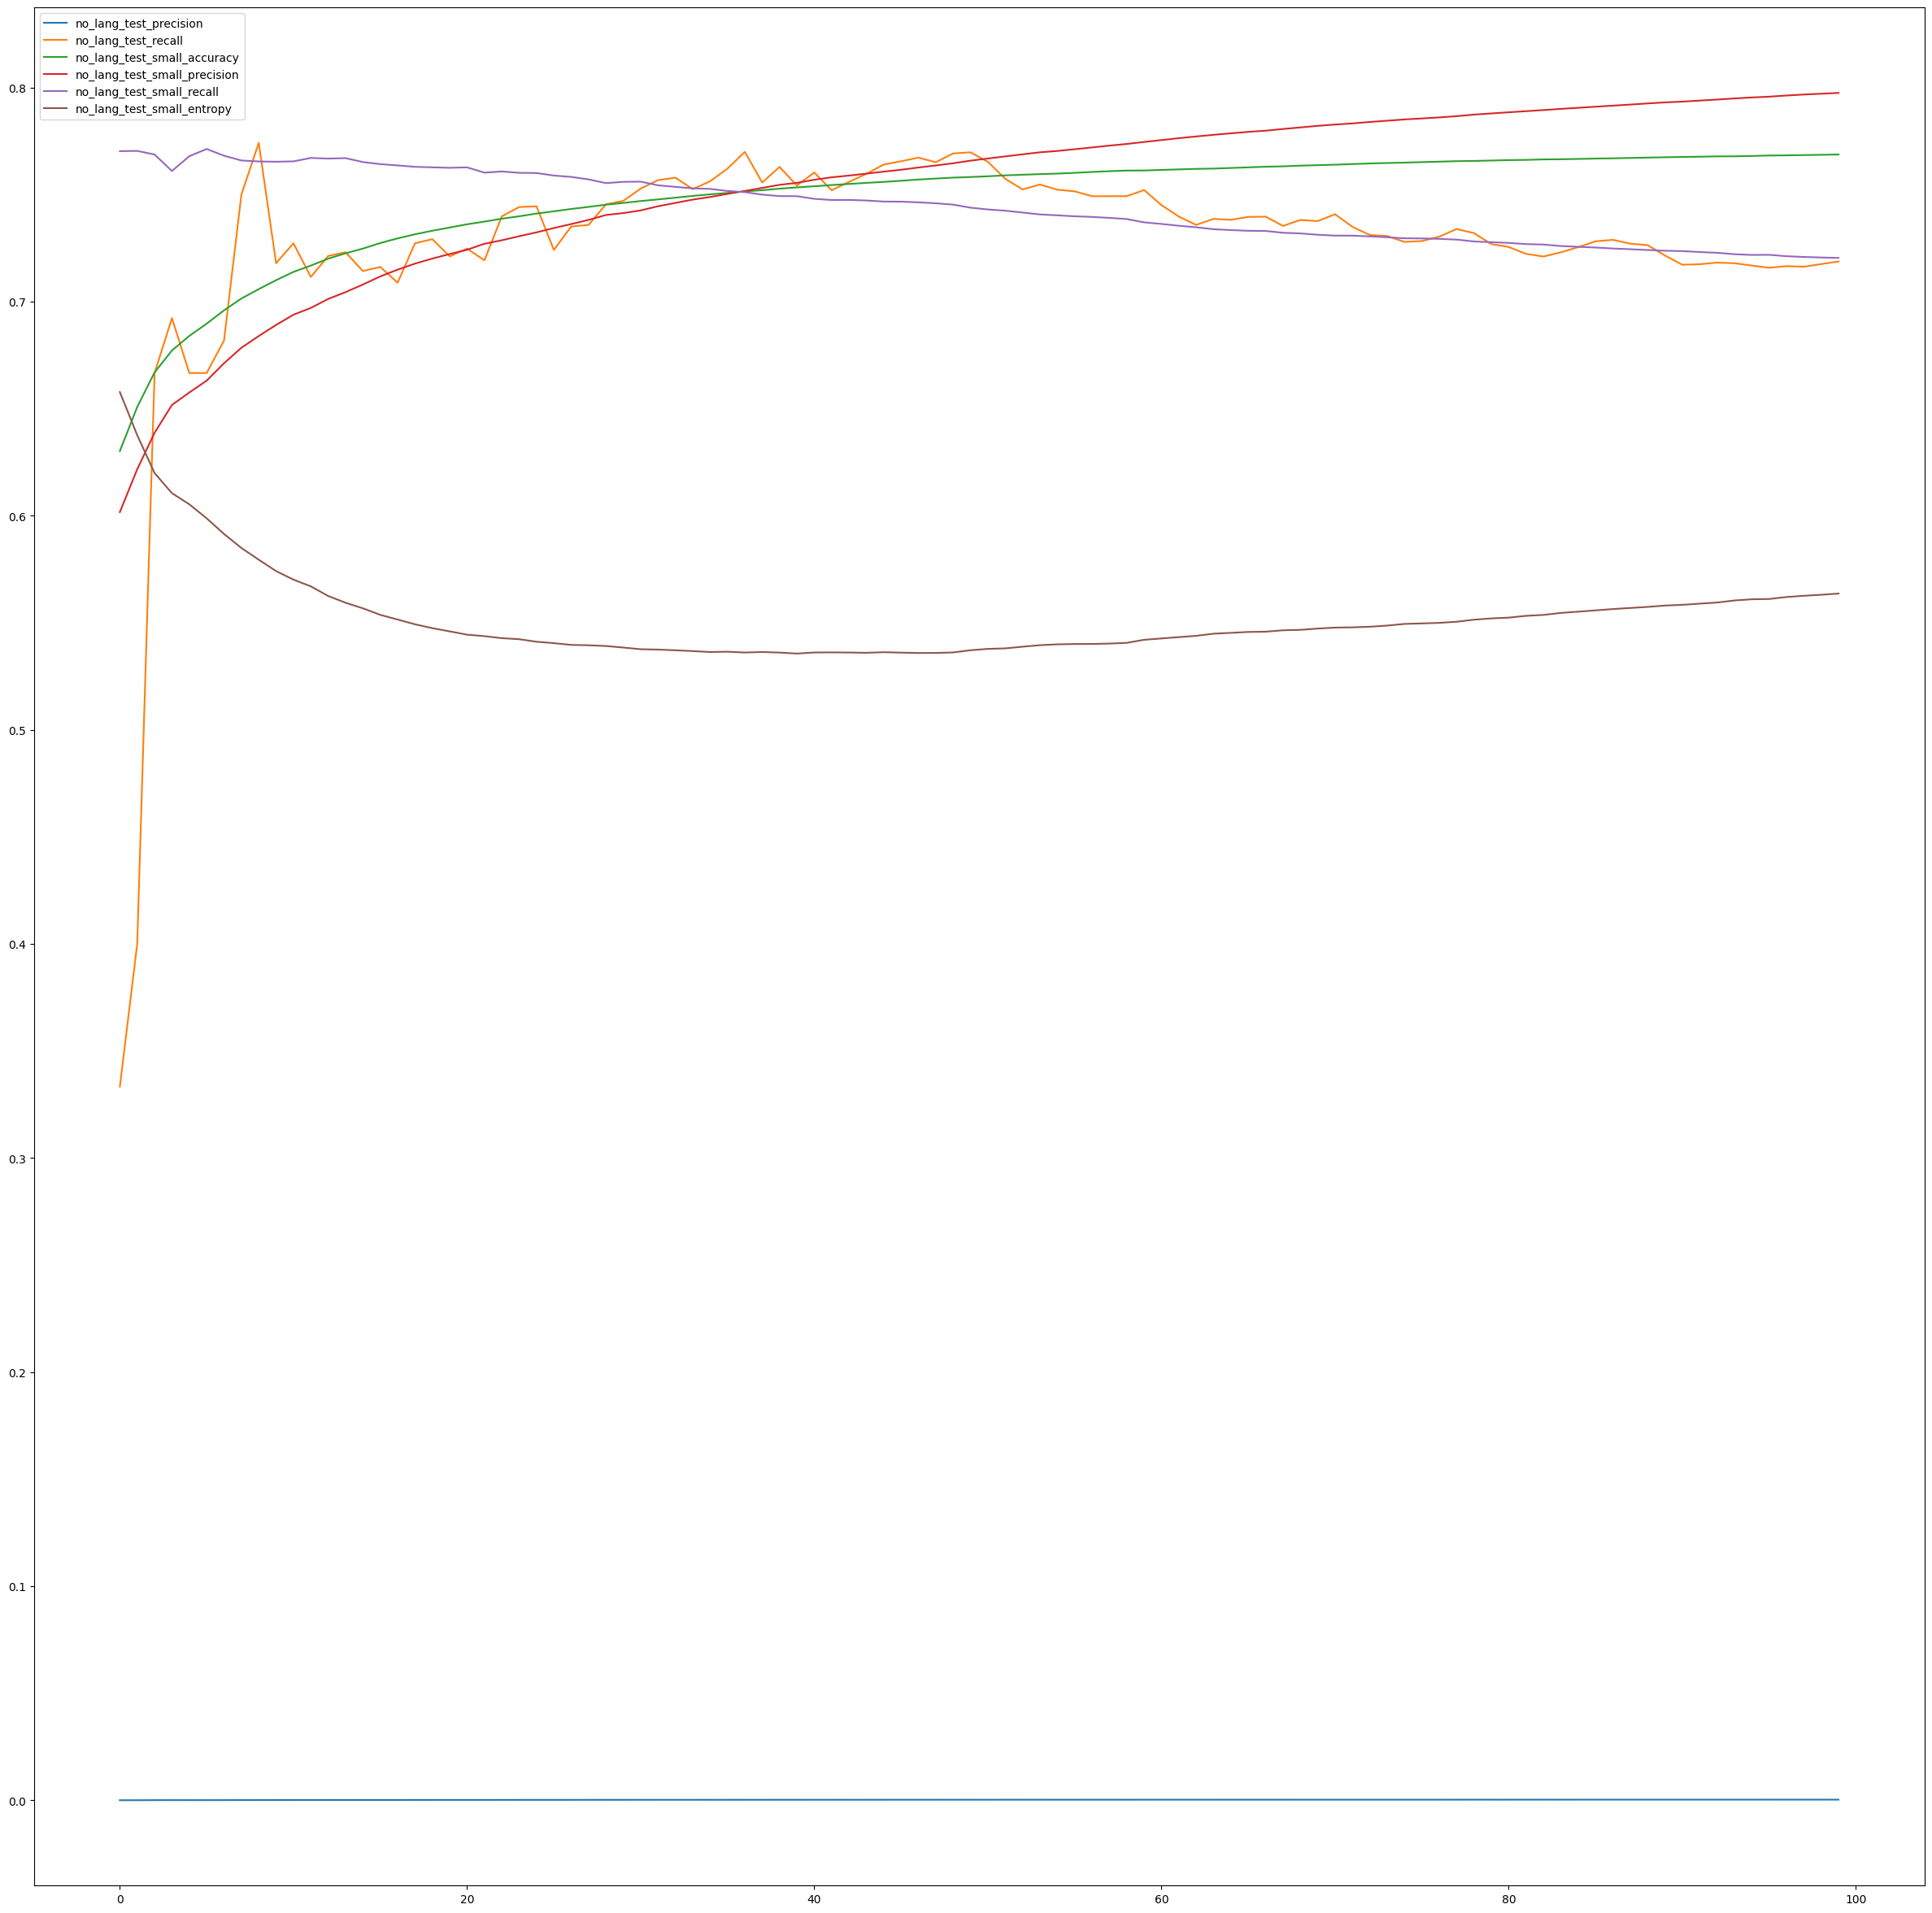

In [6]:
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt

running_data = pd.DataFrame(hist.history)
display(Markdown("**Entropy metrics**"))
running_data[["entropy", "entropy_large_set","full_entropy"]].plot(figsize = (30, 30))

display(Markdown("**Training metrics**"))
running_data[["accuracy", "precision", "recall"]].plot(figsize = (30, 30))
plt.show()

display(Markdown("**Training full metrics**"))
running_data[[x for x in running_data.columns if x.startswith("full")]].plot(figsize = (30, 30))
plt.show()

display(Markdown("**Test metrics**"))
running_data[[x for x in running_data.columns if x.startswith("test")]].plot(figsize = (30, 30))
plt.show()

display(Markdown("**Training full metrics (no lang)**"))
running_data[[x for x in running_data.columns if x.startswith("no_lang_full")]].plot(figsize = (30, 30))
plt.show()

display(Markdown("**Test metrics (no lang)**"))
running_data[[x for x in running_data.columns if x.startswith("no_lang_test")]].plot(figsize = (30, 30))
plt.show()

In [4]:
data.contents.loc[data.contents["description"].apply(lambda x: type(x) == str and ("http://" in x or "https://" in x))]

,title,description,kind,text,language,copyright_holder,license,description_translate,title_translate
id,,,,,,,,,
c_00025aaa1533,अंग्रेजी ओके प्लीज 1.2,source_url=http://www.prathamopenschool.org/Co...,video,NaN,mr,NaN,NaN,/Sort diagrams/Default/as _inserted,"and an ephah of fine flour for the basket, and..."
c_001fd9fa012c,"Bruegel, Tower of Babel","Pieter Bruegel the Elder, _The Tower of Babel_...",video,BETH HARRIS: We're in the Kunsthistorisches Mu...,en,Khan Academy,CC BY-NC-SA,"Pieter Bruegel the Elder, _The Tower of Babel_...","Bruegel, Tower of Babel"
c_003be9e91ec7,Diabetic nephropathy - Clinical presentation &...,Visit us (http://www.khanacademy.org/science/h...,video,- [Voiceover] Diabetic nephropathy is one of t...,en,Khan Academy,CC BY-NC-SA,Visit us (http://www.khanacademy.org/science/h...,Diabetic nephropathy - Clinical presentation &...
c_0040d6410001,6 हाडांना जोडून ठेवणारे सांधे,source_url=http://www.prathamopenschool.org/Co...,video,NaN,mr,NaN,NaN,/Sort diagrams/Default/as ht:,• Feed columns
c_0044989124e0,જોકરનું સંતુલન,source_url=http://www.prathamopenschool.org/Co...,video,NaN,gu,NaN,NaN,source_url=http://www.prathamopensschool.org/C...,The balance of the jack
...,...,...,...,...,...,...,...,...,...
c_ffccf547948b,1 अनुकूलन,source_url=http://www.prathamopenschool.org/Co...,video,NaN,hi,NaN,NaN,Source_url=http://www.pthorfaces.org/Courtent/...,1 Adaptation
c_ffcf24195ae3,रक्तदाब म्हणजे काय?,source_url=http://www.prathamopenschool.org/Co...,document,NaN,mr,NaN,NaN,/Sort diagrams/Default/by _inserted,What's the blood of the sentence?
c_ffe053c97c96,Role Play (Drama),source_url=http://www.prathamopenschool.org/Co...,video,NaN,ur,NaN,NaN,NaN,NaN
